<a href="https://colab.research.google.com/github/Ftsnba/Data-Science/blob/master/Estudo_Enem_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Importando as bibliotecas
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [0]:
#Upload do arquivo
df = pd.read_csv(r"C:\Users\ftspu\OneDrive\Documentos\Projeto_estatistica\Base_Enem_Reduzida5.csv", 
                 error_bad_lines=False, encoding="utf-8")

In [0]:
#Exibindo as 5 primeiras linhas
df.head()

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_mae,Renda_Mensal,Possui_Computador,Acesso_Internet,Cor/Raça,Tipo_Escola,media_notas
0,São João dos Patos,MA,23.0,F,521.0,568.7,513.1,480.3,280.0,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,"Até R$ 954,00",Não,Não,Parda,Não Respondeu,472.62
1,João Pessoa,PB,23.0,F,461.8,564.0,466.8,538.8,580.0,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,"Até R$ 954,00","Sim, um",Sim,Branca,Não Respondeu,522.28
2,Parnaíba,PI,39.0,M,499.3,663.2,605.2,733.8,680.0,Nunca estudou,"Completou o Ensino Médio, mas não completou a ...","De R$ 3.816,01 até R$ 4.770,00","Sim, um",Sim,Parda,Não Respondeu,636.30
3,Fortaleza,CE,19.0,M,411.8,429.8,445.2,459.0,340.0,Completou a 8ª série/9º ano do Ensino Fundamen...,Completou a 8ª série/9º ano do Ensino Fundamen...,"De R$ 954,01 até R$ 1.431,00",Não,Não,Parda,Pública,417.16
4,Cuiabá,MT,25.0,F,469.4,650.2,606.6,525.4,740.0,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...","De R$ 954,01 até R$ 1.431,00",Não,Não,Parda,Não Respondeu,598.32


In [0]:
#Exibindo os tipos de dados e a informação referente a memória
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3893671 entries, 0 to 3893670
Data columns (total 16 columns):
NO_MUNICIPIO_RESIDENCIA    object
SG_UF_RESIDENCIA           object
NU_IDADE                   int32
TP_SEXO                    category
NU_NOTA_CN                 float64
NU_NOTA_CH                 float64
NU_NOTA_LC                 float64
NU_NOTA_MT                 float64
NU_NOTA_REDACAO            float64
Escolaridade_Pai           object
Escolaridade_mae           object
Renda_Mensal               object
Possui_Computador          object
Acesso_Internet            object
Cor/Raça                   object
Tipo_Escola                object
dtypes: category(1), float64(5), int32(1), object(9)
memory usage: 434.5+ MB


In [0]:
#Alterando o tipo da coluna NU_IDADE
df["NU_IDADE"] = df["NU_IDADE"].astype("int32")

In [0]:
#Alterando o tipo da coluna TP_SEXO
df["TP_SEXO"] = df["TP_SEXO"].astype("category")

In [0]:
#Verificando número de linhas e colunas
df.shape

(3893671, 17)

In [0]:
#Criando uma coluna com a média das notas
df["media_notas"] = df[["NU_NOTA_CN", "NU_NOTA_CH", "NU_NOTA_LC", "NU_NOTA_MT","NU_NOTA_REDACAO"]].mean(axis=1)

In [0]:
#Média Geral
df["media_notas"].mean()

528.9268456630977

In [0]:
#Exibindo informações estatísticas
df.describe()

,NU_IDADE,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,media_notas
count,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06,3.893671e+06
mean,2.140588e+01,4.937584e+02,5.708116e+02,5.285162e+02,5.354898e+02,5.160582e+02,5.289268e+02
std,7.092174e+00,7.412505e+01,7.918564e+01,7.225214e+01,1.031111e+02,1.843693e+02,8.267996e+01
min,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.700000e+01,4.358000e+02,5.134000e+02,4.780000e+02,4.553000e+02,3.600000e+02,4.675400e+02
50%,1.900000e+01,4.834000e+02,5.849000e+02,5.334000e+02,5.166000e+02,5.200000e+02,5.201800e+02
75%,2.200000e+01,5.424000e+02,6.297000e+02,5.813000e+02,6.008000e+02,6.400000e+02,5.812800e+02
max,9.000000e+01,8.696000e+02,8.504000e+02,8.169000e+02,9.961000e+02,1.000000e+03,8.581800e+02


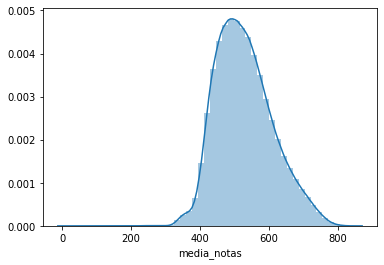

In [0]:
#Histograma
%matplotlib inline
sns.distplot(df["media_notas"])
#plt.savefig("Histograma.png")

In [0]:
#Média por tipo de escola
media_tipoescola = df.groupby("Tipo_Escola")["media_notas"].mean()
media_tipoescola

Tipo_Escola
Exterior         607.262634
Não Respondeu    530.425149
Privada          521.400270
Pública          501.844105
Name: media_notas, dtype: float64

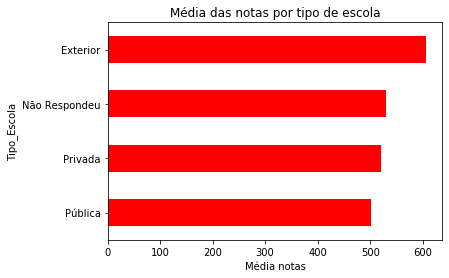

In [0]:
#Gráfico Média por tipo de escola
media_tipoescola.nsmallest(4).plot.barh(title="Média das notas por tipo de escola", color="r")
plt.xlabel("Média notas")
plt.savefig("Médias x Tipo_Escola.png")

In [0]:
#Médias por Renda
renda = df.groupby("Renda_Mensal")["media_notas"].mean()
renda

Renda_Mensal
Até R$ 954,00                       489.171824
De R$ 1.431,01 até R$ 1.908,00      526.584230
De R$ 1.908,01 até R$ 2.385,00      533.786041
De R$ 11.448,01 até R$ 14.310,00    631.175275
De R$ 14.310,01 até R$ 19.080,00    638.354681
De R$ 2.385,01 até R$ 2.862,00      549.489057
De R$ 2.862,01 até R$ 3.816,00      557.349961
De R$ 3.816,01 até R$ 4.770,00      573.616998
De R$ 4.770,01 até R$ 5.724,00      584.567301
De R$ 5.724,01 até R$ 6.678,00      596.163102
De R$ 6.678,01 até R$ 7.632,00      602.670960
De R$ 7.632,01 até R$ 8.586,00      611.564320
De R$ 8.586,01 até R$ 9.540,00      614.920454
De R$ 9.540,01 até R$ 11.448,00     622.814202
De R$ 954,01 até R$ 1.431,00        509.135433
Mais de R$ 19.080,00                648.259108
Nenhuma renda                       482.590316
Name: media_notas, dtype: float64

Text(0.5, 0, 'Média Notas')

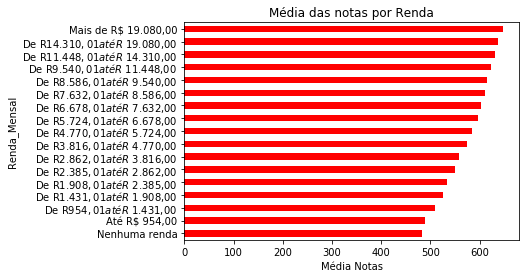

In [0]:
#Gráfico médias por renda
%matplotlib inline
renda.nsmallest(17).plot.barh(title="Média das notas por Renda", color="r")
plt.xlabel("Média Notas")
#plt.savefig("Médias x Renda.png")

In [0]:
#Médias por Escolaridade Pai
escolaridade_pai = df.groupby("Escolaridade_Pai")["media_notas"].mean()
escolaridade_pai

Escolaridade_Pai
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    514.585447
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       524.858886
Completou a Faculdade, mas não completou a Pós-graduação                                  592.592451
Completou a Pós-graduação                                                                 610.234054
Completou o Ensino Médio, mas não completou a Faculdade                                   544.321363
Nunca estudou                                                                             479.476129
Não completou a 4ª série/5º ano do Ensino Fundamental                                     499.091088
Não sei                                                                                   506.782120
Name: media_notas, dtype: float64

Text(0.5, 0, 'Média Notas')

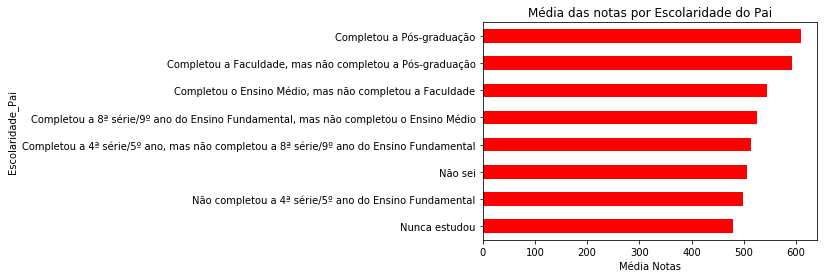

In [0]:
#Gráfico Médias por escolaridade do pai
escolaridade_pai.nsmallest(9).plot.barh(title="Média das notas por Escolaridade do Pai", color="r")
plt.xlabel("Média Notas")

In [0]:
#Médias por escolaridade da mãe
escolaridade_mae = df.groupby("Escolaridade_mae")["media_notas"].mean()
escolaridade_mae

Escolaridade_mae
Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental    507.854548
Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio       516.272892
Completou a Faculdade, mas não completou a Pós-graduação                                  578.880299
Completou a Pós-graduação                                                                 590.454456
Completou o Ensino Médio, mas não completou a Faculdade                                   535.816375
Nunca estudou                                                                             474.971965
Não completou a 4ª série/5º ano do Ensino Fundamental                                     494.480509
Não sei                                                                                   493.497780
Name: media_notas, dtype: float64

Text(0.5, 0, 'Média Notas')

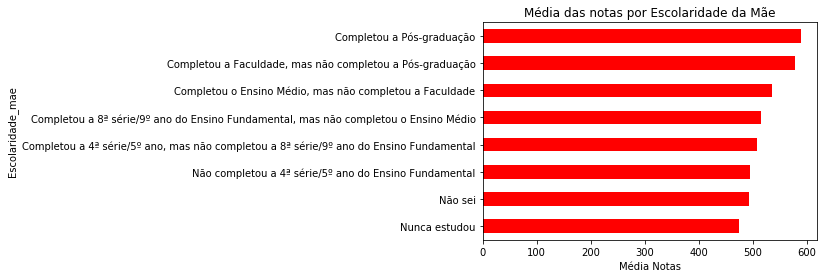

In [0]:
#Gráfico médias por escolaridade da mãe
escolaridade_mae.nsmallest(9).plot.barh(title="Média das notas por Escolaridade da Mãe", color="r")
plt.xlabel("Média Notas")

In [0]:
#Exibindo as 10 maiores médias
df.nlargest(10, "media_notas")

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_mae,Renda_Mensal,Possui_Computador,Acesso_Internet,Cor/Raça,Tipo_Escola,media_notas
1791930,Aracaju,SE,17,M,831.4,850.4,725.9,943.2,940.0,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...","De R$ 3.816,01 até R$ 4.770,00","Sim, um",Sim,Branca,Exterior,858.18
2143940,Valinhos,SP,17,M,823.4,815.7,708.7,958.7,960.0,Completou a Pós-graduação,Completou a Pós-graduação,"De R$ 14.310,01 até R$ 19.080,00","Sim, dois",Sim,Branca,Exterior,853.30
1321766,Rio de Janeiro,RJ,17,M,834.1,775.6,713.0,963.4,980.0,"Completou a Faculdade, mas não completou a Pós...",Completou a Pós-graduação,"Mais de R$ 19.080,00","Sim, três",Sim,Branca,Exterior,853.22
2656452,Fortaleza,CE,18,M,762.6,821.0,714.3,986.7,980.0,Completou a Pós-graduação,Completou a Pós-graduação,"De R$ 14.310,01 até R$ 19.080,00","Sim, quatro ou mais",Sim,Branca,Não Respondeu,852.92
1664581,Teresina,PI,18,F,775.0,840.9,720.0,967.0,960.0,"Completou o Ensino Médio, mas não completou a ...",Completou a Pós-graduação,"De R$ 14.310,01 até R$ 19.080,00","Sim, dois",Sim,Parda,Exterior,852.58
1909311,Goiânia,GO,17,M,787.1,850.4,743.2,900.3,980.0,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...","De R$ 14.310,01 até R$ 19.080,00","Sim, dois",Sim,Branca,Exterior,852.20
1308167,Vitória,ES,17,M,869.6,798.2,695.7,953.0,940.0,Completou a Pós-graduação,"Completou o Ensino Médio, mas não completou a ...","De R$ 6.678,01 até R$ 7.632,00","Sim, três",Sim,Parda,Exterior,851.30
940334,São Luís,MA,17,M,795.8,801.3,710.9,987.9,960.0,"Completou a Faculdade, mas não completou a Pós...",Completou a Pós-graduação,"Mais de R$ 19.080,00","Sim, dois",Sim,Parda,Exterior,851.18
2375529,Natal,RN,17,M,839.1,825.8,705.4,964.8,920.0,Completou a Pós-graduação,Completou a Pós-graduação,"Mais de R$ 19.080,00","Sim, quatro ou mais",Sim,Branca,Exterior,851.02
399091,Sorocaba,SP,17,M,843.0,757.4,719.6,973.5,960.0,"Completou a Faculdade, mas não completou a Pós...","Completou a Faculdade, mas não completou a Pós...","De R$ 11.448,01 até R$ 14.310,00","Sim, três",Sim,Branca,Exterior,850.70


In [0]:
#Exibindo as 10 menores médias
df.nsmallest(10, "media_notas")

,NO_MUNICIPIO_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Escolaridade_Pai,Escolaridade_mae,Renda_Mensal,Possui_Computador,Acesso_Internet,Cor/Raça,Tipo_Escola,media_notas
426403,Paulista,PE,50,F,0.0,0.0,0.0,0.0,0.0,Nunca estudou,"Completou o Ensino Médio, mas não completou a ...",Nenhuma renda,"Sim, um",Não,Parda,Não Respondeu,0.0
683472,Contagem,MG,16,F,0.0,0.0,0.0,0.0,0.0,"Completou a 4ª série/5º ano, mas não completou...",Completou a 8ª série/9º ano do Ensino Fundamen...,"De R$ 954,01 até R$ 1.431,00",Não,Sim,Parda,Não Respondeu,0.0
854805,Juazeiro,BA,41,M,0.0,0.0,0.0,0.0,0.0,"Completou a Faculdade, mas não completou a Pós...","Completou o Ensino Médio, mas não completou a ...",Nenhuma renda,Não,Não,Parda,Não Respondeu,0.0
942425,Messias Targino,RN,45,M,0.0,0.0,0.0,0.0,0.0,Não sei,Não sei,"Até R$ 954,00",Não,Não,Parda,Não Respondeu,0.0
978006,Lorena,SP,40,F,0.0,0.0,0.0,0.0,0.0,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,"Até R$ 954,00","Sim, dois",Não,Branca,Não Respondeu,0.0
1045390,Parnamirim,RN,31,F,0.0,0.0,0.0,0.0,0.0,Não completou a 4ª série/5º ano do Ensino Fund...,Não sei,"Até R$ 954,00",Não,Não,Parda,Não Respondeu,0.0
1465938,Fartura,SP,39,M,0.0,0.0,0.0,0.0,0.0,Completou a 8ª série/9º ano do Ensino Fundamen...,Não completou a 4ª série/5º ano do Ensino Fund...,"Até R$ 954,00","Sim, dois",Sim,Branca,Não Respondeu,0.0
1565311,Barão de Grajaú,MA,38,F,0.0,0.0,0.0,0.0,0.0,Nunca estudou,Nunca estudou,"Até R$ 954,00",Não,Não,Parda,Não Respondeu,0.0
1770530,Presidente Prudente,SP,45,M,0.0,0.0,0.0,0.0,0.0,Não completou a 4ª série/5º ano do Ensino Fund...,Não completou a 4ª série/5º ano do Ensino Fund...,"Até R$ 954,00",Não,Não,Parda,Não Respondeu,0.0
1921173,Natal,RN,29,F,0.0,0.0,0.0,0.0,0.0,"Completou a 4ª série/5º ano, mas não completou...","Completou a 4ª série/5º ano, mas não completou...","De R$ 954,01 até R$ 1.431,00",Não,Não,Parda,Não Respondeu,0.0


In [0]:
#Separando alunos de escola pública
escola_publica = df.loc[df["Tipo_Escola"] == "Pública"]

In [0]:
#Separando alunos de escola privada
escola_privada = df.loc[df["Tipo_Escola"] == "Privada"]

In [0]:
#Diferença nas médias de escola pública e privada
dif_medias = escola_publica["media_notas"].mean() - escola_privada["media_notas"].mean()
dif_medias

-19.556165799289374

In [0]:
import statsmodels.api as sm

In [0]:
#Testando a primeira Hipótese
N1 = escola_publica["media_notas"] 
N2 = escola_privada["media_notas"]
resultado_teste = sm.stats.ttest_ind(x1=N1,x2=N2, value=0, alternative="two-sided", weights=(None, None),usevar='pooled')

In [0]:
#Criando função para exibir o resultado do teste de hipótese
def resultado_hipotese(resultado_teste):
    if resultado_teste <= 0.05:
        print("Rejeita-se a hipótese nula")
    else:
        print("Falha em rejeitar a Hipótese nula")

In [0]:
#Verificando o p-value do teste
resultado_hipotese(resultado_teste[1])

Rejeita-se a hipótese nula


In [0]:
#Exibindo o resultado do teste
resultado_teste

(-27.437951216981904, 1.1433167334345974e-165, 850112.0)

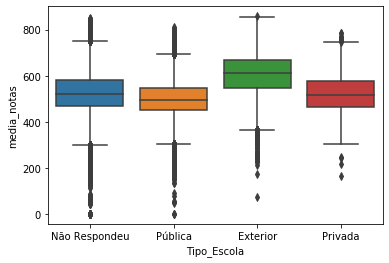

In [0]:
#Boxplot das médias por tipo de escola
#matplotlib inline
sns.boxplot(x=df["Tipo_Escola"],y=df["media_notas"], data=df)
plt.savefig("Boxplot_tipoEscola.png")

In [0]:
#Separando os alunos de baixa renda
baixa_renda = df.loc[(df["Renda_Mensal"] == "Nenhuma renda") | (df["Renda_Mensal"] == "Até R$ 954,00") | (df["Renda_Mensal"]
                == "De R$ 954,01 até R$ 1.431,00") | (df["Renda_Mensal"] == "De R$ 1.431,01 até R$ 1.908,00") | (df["Renda_Mensal"]
                == "De R$ 1.908,01 até R$ 2.385,00") | (df["Renda_Mensal"] == "De R$ 2.385,01 até R$ 2.862,00")] 

In [0]:
baixa_renda.shape

(2924003, 17)

In [0]:
escola_publica.shape

(840352, 17)

In [0]:
escola_privada.shape

(9762, 17)

In [0]:
#separando os alunos de renda média
renda_media = df.loc[(df["Renda_Mensal"] == "De R$ 2.862,01 até R$ 3.816,00") | (df["Renda_Mensal"] == "De R$ 3.816,01 até R$ 4.770,00") | (df["Renda_Mensal"]
                == "De R$ 4.770,01 até R$ 5.724,00") | (df["Renda_Mensal"] == "De R$ 5.724,01 até R$ 6.678,00")] 

In [0]:
renda_media.shape

(664514, 14)

In [0]:
#Separando os alunos de alta renda
alta_renda = df.loc[(df["Renda_Mensal"] == "De R$ 6.678,01 até R$ 7.632,00") | (df["Renda_Mensal"] == "De R$ 7.632,01 até R$ 8.586,00") | (df["Renda_Mensal"]
                == "De R$ 8.586,01 até R$ 9.540,00") | (df["Renda_Mensal"] == "De R$ 9.540,01 até R$ 11.448,00")
                  | (df["Renda_Mensal"] == "De R$ 11.448,01 até R$ 14.310,00")] 

In [0]:
alta_renda.shape

(185740, 14)

In [0]:
#total de alunos com renda maior que 19 mil
renda1 = df.loc[(df["Renda_Mensal"] == "Mais de R$ 19.080,00")]

In [0]:
renda1.shape

(45020, 14)

In [0]:
#Testando a segunda hipótese
N3 = baixa_renda["media_notas"] 
N4 = renda_media["media_notas"]
resultado_teste1 = sm.stats.ttest_ind(x1=N3,x2=N4, value=0, alternative="two-sided", weights=(None, None),usevar='pooled')

In [0]:
resultado_teste1

(-642.3952374962714, 0.0, 3588515.0)

In [0]:
resultado_hipotese(resultado_teste1[1])

Rejeita-se a hipótese nula


In [0]:
#Testando a segunda hipótese
N5 = renda_media["media_notas"] 
N6 = alta_renda["media_notas"]
resultado_teste2 = sm.stats.ttest_ind(x1=N5,x2=N6, value=0, alternative="two-sided", weights=(None, None),usevar='pooled')

In [0]:
resultado_teste2

(-191.49964452747182, 0.0, 850252.0)

In [0]:
resultado_hipotese(resultado_teste2[1])

Rejeita-se a hipótese nula


In [0]:
baixa_renda["media_notas"].mean()

509.28867706357073

In [0]:
renda_media["media_notas"].mean()

571.9322580111025

In [0]:
alta_renda["media_notas"].mean()

616.135196216274

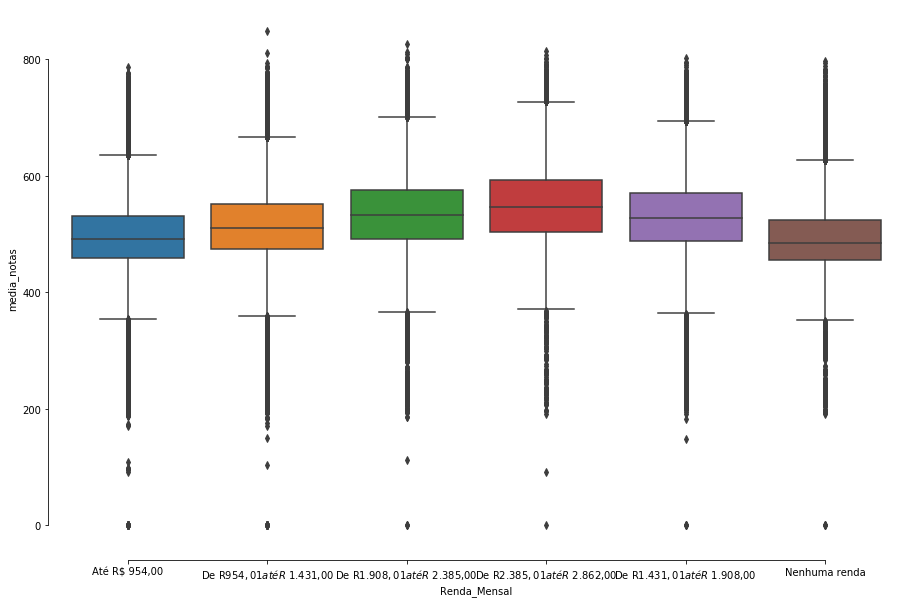

In [0]:
#matplotlib notebook
#Boxplot das médias por alunos de baixa renda
plt.figure(figsize=(15,10))
sns.boxplot(x=baixa_renda["Renda_Mensal"],y=df["media_notas"], data=df)
sns.despine(offset=10, trim=True)

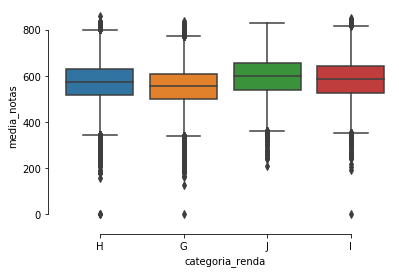

In [0]:
%matplotlib inline
#Boxplot das médias por alunos de renda média
#plt.figure(figsize=(10,10))
sns.boxplot(x=renda_media["categoria_renda"],y=df["media_notas"], data=df)
sns.despine(offset=10, trim=True)

<IPython.core.display.Javascript object>


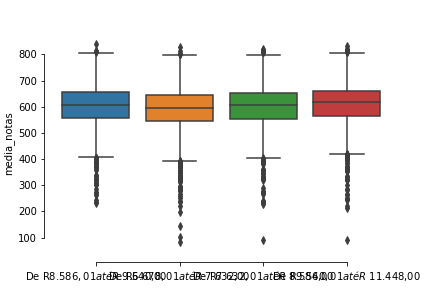

In [0]:
%matplotlib notebook
#Boxplot das médias por alunos de alta renda
#plt.figure(figsize=(10,10))
sns.boxplot(x=alta_renda["Renda_Mensal"],y=df["media_notas"], data=df)
sns.despine(offset=10, trim=True)

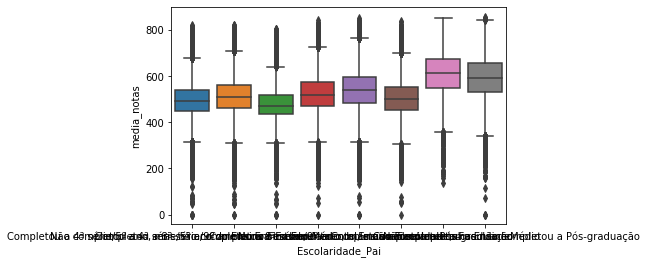

In [0]:
%matplotlib inline
#Boxplot das médias por escolaridade do pai
#plt.figure(figsize=(10,10))
sns.boxplot(x=df["Escolaridade_Pai"],y=df["media_notas"], data=df)

In [0]:
#Criando uma função para categorizar a renda
def categorizarenda(l):
    if l == "Nenhuma renda":
        return "A"
    elif l == "Até R$ 954,00":
        return "B"
    elif l == "De R$ 954,01 até R$ 1.431,00":
        return "C"
    elif l == "De R$ 1.431,01 até R$ 1.908,00":
        return "D"
    elif l == "De R$ 1.908,01 até R$ 2.385,00":
        return "E"
    elif l == "De R$ 2.385,01 até R$ 2.862,00":
        return "F"
    elif l == "De R$ 2.862,01 até R$ 3.816,00":
        return "G"
    elif l == "De R$ 3.816,01 até R$ 4.770,00":
        return "H"
    elif l == "De R$ 4.770,01 até R$ 5.724,00":
        return "I"
    elif l == "De R$ 5.724,01 até R$ 6.678,00":
        return "J"
    elif l == "De R$ 6.678,01 até R$ 7.632,00":
        return "K"
    elif l == "De R$ 7.632,01 até R$ 8.586,00":
        return "L"
    elif l == "De R$ 8.586,01 até R$ 9.540,00":
        return "M"
    elif l == "De R$ 9.540,01 até R$ 11.448,00":
        return "N"
    elif l == "De R$ 11.448,01 até R$ 14.310,00":
        return "O"
    elif l == "De R$ 14.310,01 até R$ 19.080,00":
        return "P"
    elif l == "Mais de R$ 19.080,00":
        return "Q"
    
    

In [0]:
#Aplicando a função de categoria de renda
df["categoria_renda"] = df["Renda_Mensal"].apply(categorizarenda)

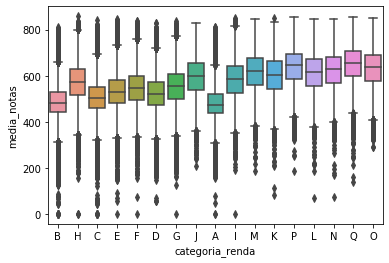

In [0]:
%matplotlib inline
#Boxplot das médias por renda
sns.boxplot(x=df["categoria_renda"],y=df["media_notas"], data=df)

In [0]:
#Criando uma função para categorizar a escolaridade
def categorizaescolaridade(w):
    if w == "Nunca estudou":
        return "A"
    elif w == "Não completou a 4ª série/5º ano do Ensino Fundamental":
        return "B"
    elif w == "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental":
        return "C"
    elif w == "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio":
        return "D"
    elif w == "Completou o Ensino Médio, mas não completou a Faculdade":
        return "E"
    elif w == "Completou a Faculdade, mas não completou a Pós-graduação":
        return "F"
    elif w == "Completou a Pós-graduação":
        return "G"
    elif w == "Não sei":
        return "H"
    

In [0]:
#Aplicando a função de categoria de escolaridade
df["categoria_escolaridade"] = df["Escolaridade_Pai"].apply(categorizaescolaridade)

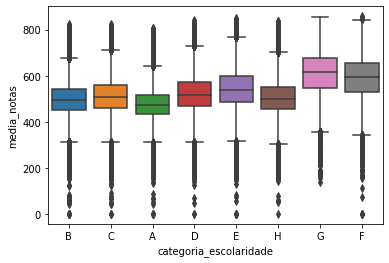

In [0]:
%matplotlib inline
#Boxplot das médias por escolaridade 
sns.boxplot(x=df["categoria_escolaridade"],y=df["media_notas"], data=df)

In [0]:
df["categoria_escolaridade_mae"] = df["Escolaridade_mae"].apply(categorizaescolaridade)

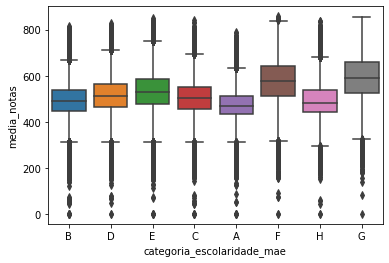

In [0]:
%matplotlib inline

sns.boxplot(x=df["categoria_escolaridade_mae"],y=df["media_notas"], data=df)

In [0]:
#Separando os alunos com pais que possuem uma alta escolaridade
escolaridade_alta =  df.loc[(df["Escolaridade_Pai"] == "Completou a Faculdade, mas não completou a Pós-graduação") | (df["Escolaridade_Pai"] == "Completou a Pós-graduação")]

In [0]:
#Separando os alunos com pais que possuem uma baixa escolaridade
escolaridade_baixa = df.loc[(df["Escolaridade_Pai"] == "Não completou a 4ª série/5º ano do Ensino Fundamental") | (df["Escolaridade_Pai"] == "Nunca estudou")
                           | (df["Escolaridade_Pai"] == "Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental")]
                 

In [0]:
#Separando os alunos com pais que possuem uma escolaridade média
escolaridade_media = df.loc[(df["Escolaridade_Pai"] == "Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio") | (df["Escolaridade_Pai"] == "Completou o Ensino Médio, mas não completou a Faculdade")]

In [0]:
#Média escolaridade alta
escolaridade_alta["media_notas"].mean()

599.2202959932332

In [0]:
#Média escolaridade baixa
escolaridade_baixa["media_notas"].mean()

502.01887418648624

In [0]:
#Média escolaridade média
escolaridade_media["media_notas"].mean()

538.3625940323136

In [0]:
#Testando a terceira hipótese
N7 = escolaridade_alta["media_notas"] 
N8 = escolaridade_baixa["media_notas"]
resultado_teste3 = sm.stats.ttest_ind(x1=N7,x2=N8, value=0, alternative="two-sided", weights=(None, None),usevar='pooled')

In [0]:
resultado_teste3

(804.7574549814873, 0.0, 2064126.0)

In [0]:
resultado_hipotese(resultado_teste3[1])

Rejeita-se a hipótese nula


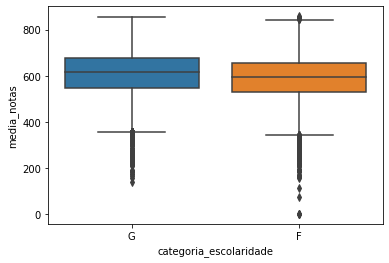

In [0]:
%matplotlib inline

sns.boxplot(x=escolaridade_alta["categoria_escolaridade"],y=escolaridade_alta["media_notas"], data=df)

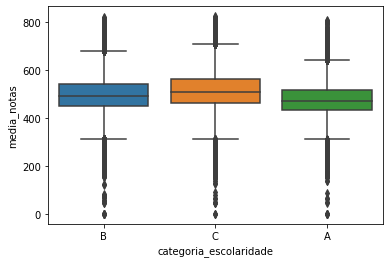

In [0]:
%matplotlib inline

sns.boxplot(x=escolaridade_baixa["categoria_escolaridade"],y=escolaridade_baixa["media_notas"], data=df)

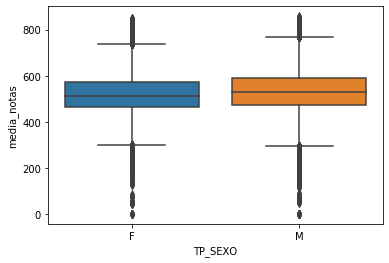

In [0]:
%matplotlib inline
sns.boxplot(x=df["TP_SEXO"],y=df["media_notas"], data=df)

In [0]:
renda2 = df.loc[(df["Renda_Mensal"] == "Nenhuma renda")]

In [0]:
renda2.shape

(153278, 17)

In [0]:
renda3 = df.loc[(df["Renda_Mensal"] == "Até R$ 954,00")]

In [0]:
renda3.shape

(891141, 17)